<a href="https://colab.research.google.com/github/AkankshaLab/Dog-Breed-Identifier/blob/main/dog_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🐶 End-to-end Multi-Class Dog Breed Classification

Using TensorFlow 2.0 and TensorFlow Hub

## 1. Problem
Identify the breed of a god given an image of dog.

## 2. Data
From Kaggle's Dog breed identification competititon.

## 3. Evaluation
Prediction probabilities for each dog breed of each test image.

## 4. Features
* Unstructured data
* 120 breeds of dog (120 different classes)
* 10,000+ images in training test(with labels)
* 10,000+ images in test set(no labels)

#### Get our workspace ready
* Import TensorFlow 2.x
* Import TensorFlow Hub
* Make sure we're using a GPU

Go to Runtime -> change runtime tipe -> select gpu

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
print("TF version: ", tf.__version__)
print("TF Hub version: ", hub.__version__)

# Check for GPU availability
print("GPU", "available (YESSSSS!!!!!!!)" if tf.config.list_physical_devices("GPU") else "not available :(")

TF version:  2.15.0
TF Hub version:  0.16.1
GPU available (YESSSSS!!!!!!!)


#### Getting our data ready (turning into Tensors)

* With all ML models, data has to be in numerical format.
* Turning our images into Tensors (numerical representation)

In [ ]:
import pandas as pd
labels_csv = pd.read_csv("drive/MyDrive/Dog Vision/dog-breed-identification/labels.csv")

In [ ]:
labels_csv.describe()

id               breed
count                              10222               10222
unique                             10222                 120
top     000bec180eb18c7604dcecc8fe0dba07  scottish_deerhound
freq                                   1                 126

In [ ]:
labels_csv.head()

id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

In [ ]:
# Images of each breed
labels_csv["breed"].value_counts()

breed
scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
golden_retriever         67
brabancon_griffon        67
komondor                 67
eskimo_dog               66
briard                   66
Name: count, Length: 120, dtype: int64

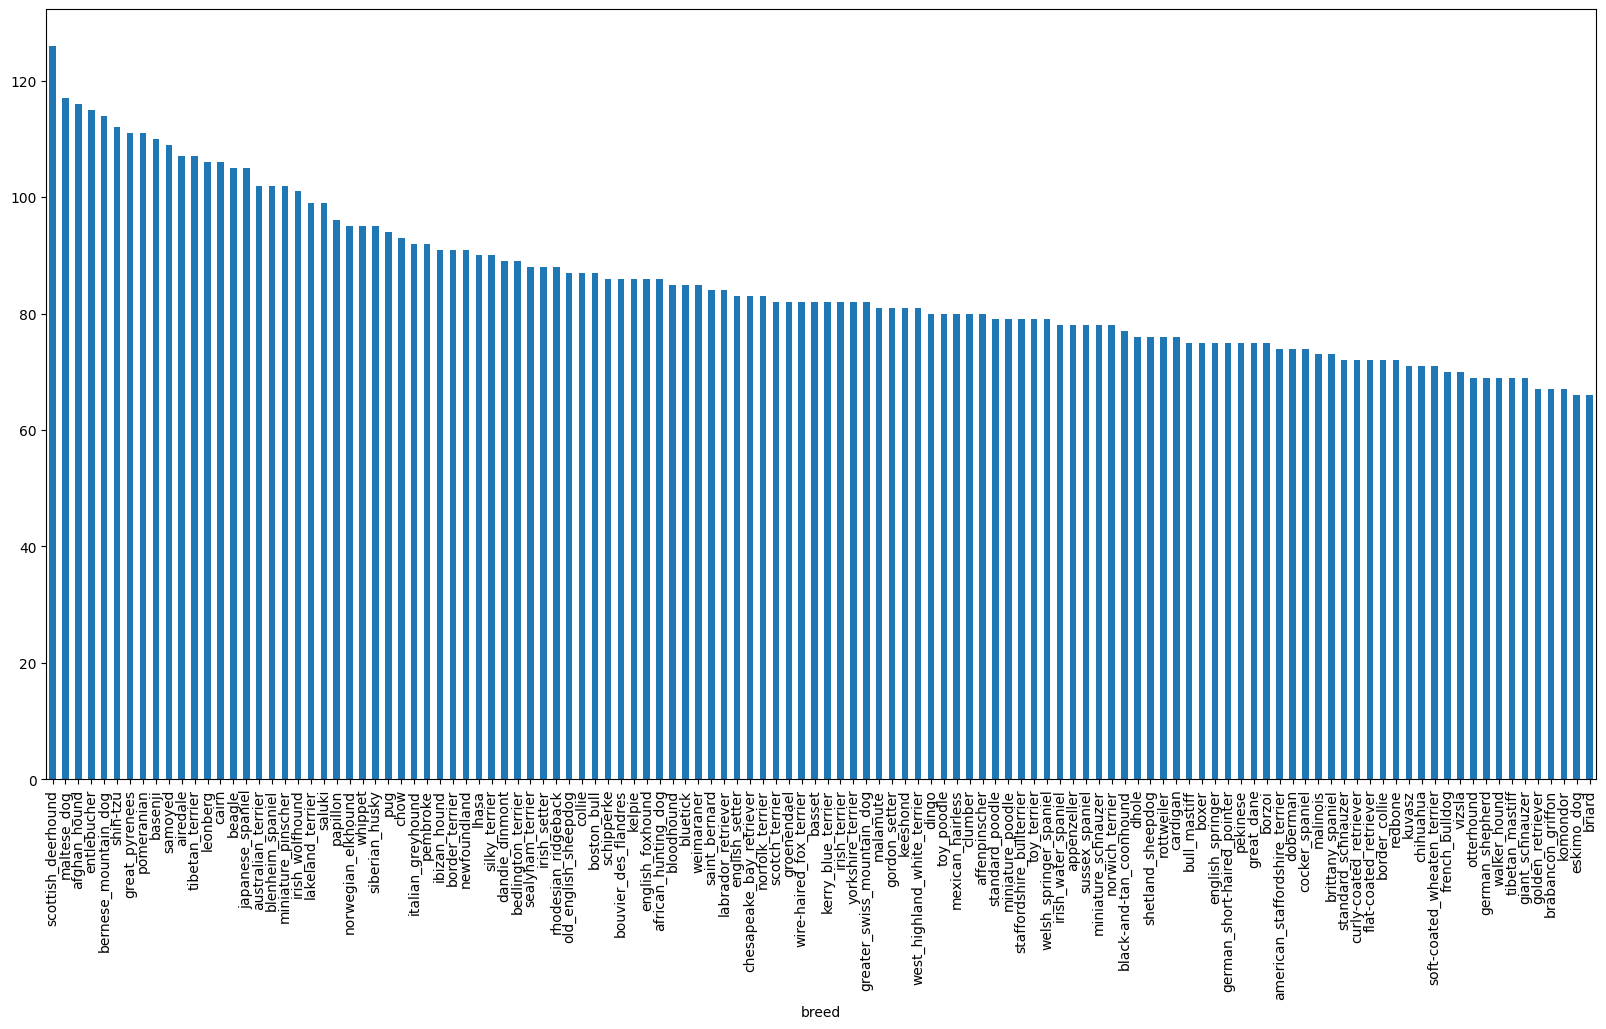

In [ ]:
labels_csv["breed"].value_counts().plot.bar(figsize=(20, 10));

In [ ]:
labels_csv["breed"].value_counts().mean()

85.18333333333334

In [ ]:
labels_csv["breed"].value_counts().median()

82.0

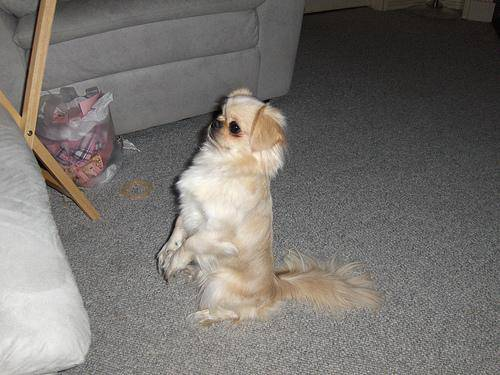

In [ ]:
# View an image
from IPython.display import Image
Image('/content/drive/MyDrive/Dog Vision/dog-breed-identification/train/001cdf01b096e06d78e9e5112d419397.jpg')

#### Getting images and their labels

In [ ]:
labels_csv.head()

id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

In [ ]:
filenames = ['/content/drive/MyDrive/Dog Vision/dog-breed-identification/train/' + fname + '.jpg' for fname in labels_csv["id"]]
filenames[:10]

['/content/drive/MyDrive/Dog Vision/dog-breed-identification/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 '/content/drive/MyDrive/Dog Vision/dog-breed-identification/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 '/content/drive/MyDrive/Dog Vision/dog-breed-identification/train/001cdf01b096e06d78e9e5112d419397.jpg',
 '/content/drive/MyDrive/Dog Vision/dog-breed-identification/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 '/content/drive/MyDrive/Dog Vision/dog-breed-identification/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 '/content/drive/MyDrive/Dog Vision/dog-breed-identification/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 '/content/drive/MyDrive/Dog Vision/dog-breed-identification/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 '/content/drive/MyDrive/Dog Vision/dog-breed-identification/train/002a283a315af96eaea0e28e7163b21b.jpg',
 '/content/drive/MyDrive/Dog Vision/dog-breed-identification/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 '/content/drive/MyDrive/Dog Vision/dog-breed-

In [ ]:
#Check whether no. of filenames matches no. of actual image files
import os
if len(os.listdir('/content/drive/MyDrive/Dog Vision/dog-breed-identification/train/')) == len(filenames):
  print("Filenames match actual amount of files")
else:
  print("Filenames do not match actual amount of files")

Filenames match actual amount of files


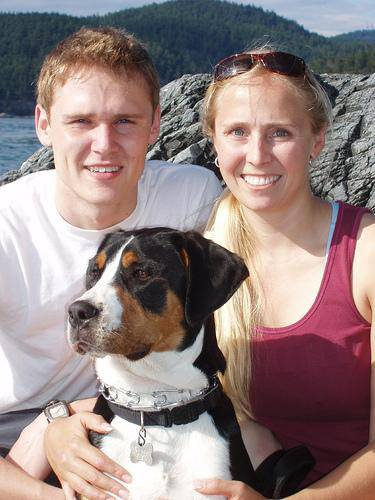

In [ ]:
Image(filenames[8700])

In [ ]:
labels_csv["breed"][8700]

'greater_swiss_mountain_dog'

In [ ]:
# Prepare labels
import numpy as np
labels = labels_csv["breed"]
labels = np.array(labels)
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [ ]:
len(labels)

10222

In [ ]:
labels = labels_csv["breed"].to_numpy()

In [ ]:
# Check if number of labels matches number of filenames
if len(labels) == len(filenames):
  print("Number of labels matches number of filenames")
else:
  print("Number of labels does not match number of filenames")

Number of labels matches number of filenames


In [ ]:
len(labels)

10222

In [ ]:
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [ ]:
# Find unique label values
unique_breeds = np.unique(labels)
unique_breeds

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

In [ ]:
# Turn a single label into an array of booleans
print(labels[0])
labels[0] == unique_breeds

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [ ]:
len(unique_breeds)

120

In [ ]:
# Turn every label into a boolean array
boolean_labels = [label == unique_breeds for label in labels]
boolean_labels

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [ ]:
len(boolean_labels)

10222

In [ ]:
labels[0]

'boston_bull'

In [ ]:
np.where(unique_breeds == labels[0])

(array([19]),)

In [ ]:
boolean_labels[0].argmax()

19

In [ ]:
# Turning boolean array into integers
# Example:
print(labels[0])
print(np.where(unique_breeds == labels[0])) # index where label occurs
print(boolean_labels[0].argmax()) # index where label occurs in boolean array
print(boolean_labels[0].astype(int)) # there will be 1 where sample label occurs

boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [ ]:
print(labels[2])
print(boolean_labels[2].astype(int))

pekinese
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [ ]:
filenames[:10]

['/content/drive/MyDrive/Dog Vision/dog-breed-identification/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 '/content/drive/MyDrive/Dog Vision/dog-breed-identification/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 '/content/drive/MyDrive/Dog Vision/dog-breed-identification/train/001cdf01b096e06d78e9e5112d419397.jpg',
 '/content/drive/MyDrive/Dog Vision/dog-breed-identification/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 '/content/drive/MyDrive/Dog Vision/dog-breed-identification/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 '/content/drive/MyDrive/Dog Vision/dog-breed-identification/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 '/content/drive/MyDrive/Dog Vision/dog-breed-identification/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 '/content/drive/MyDrive/Dog Vision/dog-breed-identification/train/002a283a315af96eaea0e28e7163b21b.jpg',
 '/content/drive/MyDrive/Dog Vision/dog-breed-identification/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 '/content/drive/MyDrive/Dog Vision/dog-breed-

#### Creating validation set

In [ ]:
X = filenames
y = boolean_labels

We're going to start off experimenting with ~1000 images and increase as needed

In [ ]:
# Set number of images to use for experimenting
NUM_IMAGES = 1000 #@param {type: "slider", min:1000, max:10000, step:1000}

In [ ]:
# Split data into train and validation sets
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X[:NUM_IMAGES],
                                                  y[:NUM_IMAGES],
                                                  test_size=0.2,
                                                  random_state=42)

len(X_train), len(X_val), len(y_train), len(y_val)

(800, 200, 800, 200)

In [ ]:
X_train[:5]

['/content/drive/MyDrive/Dog Vision/dog-breed-identification/train/00bee065dcec471f26394855c5c2f3de.jpg',
 '/content/drive/MyDrive/Dog Vision/dog-breed-identification/train/0d2f9e12a2611d911d91a339074c8154.jpg',
 '/content/drive/MyDrive/Dog Vision/dog-breed-identification/train/1108e48ce3e2d7d7fb527ae6e40ab486.jpg',
 '/content/drive/MyDrive/Dog Vision/dog-breed-identification/train/0dc3196b4213a2733d7f4bdcd41699d3.jpg',
 '/content/drive/MyDrive/Dog Vision/dog-breed-identification/train/146fbfac6b5b1f0de83a5d0c1b473377.jpg']

In [ ]:
y_train[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False,  True,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

#### Preprocessing images (Turning images into Tensors)
1. Take an image filepath as input
2. Use TensorFlow to read the file and save it to a variable 'image'
3. Turn 'image' (a jpg) into Tensors
4. Normalize our image (convert color channel values from 0-255 to 0-1)
5. Resize the 'image' to be a shape of (224, 224)
6. Return the modified image

In [ ]:
from matplotlib.pyplot import imread     #stands for image read
image = imread(filenames[0])
image.shape  # returns height, width, color channel

(375, 500, 3)

array([[[108,  46,   0],
        [152,  92,  42],
        [180, 120,  70],
        ...,
        [176, 144,  69],
        [189, 157,  82],
        [214, 182, 107]],

       [[151,  93,  47],
        [179, 121,  75],
        [167, 111,  64],
        ...,
        [167, 136,  56],
        [172, 139,  60],
        [188, 157,  77]],

       [[151,  98,  56],
        [188, 137,  94],
        [162, 113,  70],
        ...,
        [200, 168,  81],
        [196, 162,  75],
        [200, 168,  81]],

       ...,

       [[189, 122,  69],
        [186, 119,  66],
        [183, 116,  63],
        ...,
        [213, 160, 106],
        [212, 159, 107],
        [209, 156, 102]],

       [[186, 119,  66],
        [184, 117,  64],
        [183, 116,  63],
        ...,
        [197, 145,  88],
        [199, 146,  92],
        [199, 147,  90]],

       [[182, 115,  62],
        [181, 114,  61],
        [183, 116,  63],
        ...,
        [184, 132,  74],
        [190, 138,  81],
        [192, 140,  82]]], dtype=uint8)
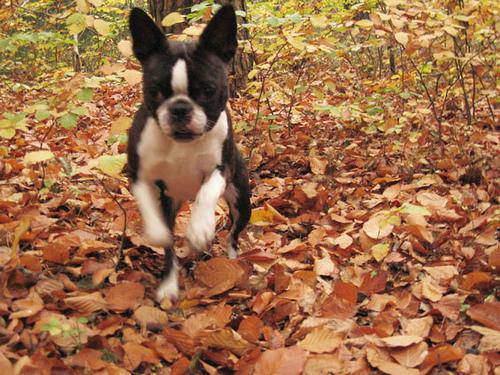

In [ ]:
image

In [ ]:
image.max(), image.min()

(255, 0)

In [ ]:
# turn image into a tensor
tf.constant(image)

<tf.Tensor: shape=(375, 500, 3), dtype=uint8, numpy=
array([[[108,  46,   0],
        [152,  92,  42],
        [180, 120,  70],
        ...,
        [176, 144,  69],
        [189, 157,  82],
        [214, 182, 107]],

       [[151,  93,  47],
        [179, 121,  75],
        [167, 111,  64],
        ...,
        [167, 136,  56],
        [172, 139,  60],
        [188, 157,  77]],

       [[151,  98,  56],
        [188, 137,  94],
        [162, 113,  70],
        ...,
        [200, 168,  81],
        [196, 162,  75],
        [200, 168,  81]],

       ...,

       [[189, 122,  69],
        [186, 119,  66],
        [183, 116,  63],
        ...,
        [213, 160, 106],
        [212, 159, 107],
        [209, 156, 102]],

       [[186, 119,  66],
        [184, 117,  64],
        [183, 116,  63],
        ...,
        [197, 145,  88],
        [199, 146,  92],
        [199, 147,  90]],

       [[182, 115,  62],
        [181, 114,  61],
        [183, 116,  63],
        ...,
        [184, 132,  7

In [ ]:
tf.constant(image)[:2]

<tf.Tensor: shape=(2, 500, 3), dtype=uint8, numpy=
array([[[108,  46,   0],
        [152,  92,  42],
        [180, 120,  70],
        ...,
        [176, 144,  69],
        [189, 157,  82],
        [214, 182, 107]],

       [[151,  93,  47],
        [179, 121,  75],
        [167, 111,  64],
        ...,
        [167, 136,  56],
        [172, 139,  60],
        [188, 157,  77]]], dtype=uint8)>

In [ ]:
tensor = tf.io.read_file(filenames[20])
tensor

<tf.Tensor: shape=(), dtype=string, numpy=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\n\x07\x07\x08\x07\x06\n\x08\x08\x08\x0b\n\n\x0b\x0e\x18\x10\x0e\r\r\x0e\x1d\x15\x16\x11\x18#\x1f%$"\x1f"!&+7/&)4)!"0A149;>>>%.DIC<H7=>;\xff\xdb\x00C\x01\n\x0b\x0b\x0e\r\x0e\x1c\x10\x10\x1c;("(;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;\xff\xc0\x00\x11\x08\x01w\x01\xf4\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x83\x84\x85\x86\x87\x88\x89\x8a\x92\x93\x94\x95\x96\x97\x98\x99\x9a\xa2\xa3\xa4\xa5\xa6\xa7\xa8\xa9\xaa\xb2\xb3\xb4\xb5\xb6\xb7\xb8\xb9\xba\xc2\xc3\xc4\xc5\xc6\xc7\xc8\xc9\xca

In [ ]:
tensor = tf.image.decode_jpeg(tensor, channels=3)

In [ ]:
tf.image.convert_image_dtype(tensor, tf.float32)

<tf.Tensor: shape=(375, 500, 3), dtype=float32, numpy=
array([[[0.4901961 , 0.5019608 , 0.45882356],
        [0.47450984, 0.48627454, 0.4431373 ],
        [0.44705886, 0.47058827, 0.42352945],
        ...,
        [0.37647063, 0.48627454, 0.25490198],
        [0.37254903, 0.48235297, 0.2509804 ],
        [0.38823533, 0.49803925, 0.26666668]],

       [[0.454902  , 0.4666667 , 0.42352945],
        [0.43921572, 0.46274513, 0.4156863 ],
        [0.427451  , 0.45098042, 0.4039216 ],
        ...,
        [0.36862746, 0.4784314 , 0.2392157 ],
        [0.36078432, 0.47058827, 0.23137257],
        [0.37254903, 0.48235297, 0.24313727]],

       [[0.43921572, 0.46274513, 0.42352945],
        [0.43137258, 0.46274513, 0.41960788],
        [0.427451  , 0.45882356, 0.4156863 ],
        ...,
        [0.36078432, 0.47450984, 0.22352943],
        [0.34509805, 0.45882356, 0.20784315],
        [0.34901962, 0.46274513, 0.21176472]],

       ...,

       [[0.8941177 , 0.89019614, 0.882353  ],
        [0.90

In [ ]:
# Make a function to preprocess image
IMG_SIZE = 224

def process_image(image_path, img_size=IMG_SIZE):
  """
  Takes an image file path and turns the image into a Tensor
  """
  # Read in an image file
  image = tf.io.read_file(image_path)

  # Turn the jpeg image into numerical Tensor with 3 colour channels (RGB)
  image = tf.image.decode_jpeg(image, channels=3)

  # Convert the color channel values from 0-255 to 0-1 values
  image = tf.image.convert_image_dtype(image, tf.float32)

  # Resize the image to desired value (224, 224)
  image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])

  return image

#### Turning our data into batches
Why turn our data into batches?
* If we are trying to process 10,000+ images in one go....they all might not fit into memory. We'll do about 32 images at a time
* We need our data in form of Tensot tuples which look like this:
`(image, label)`

In [ ]:
X[42]

'/content/drive/MyDrive/Dog Vision/dog-breed-identification/train/011e06760794850c40f23d6426c40774.jpg'

In [ ]:
y[42]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [ ]:
# Create a function to return of tuple (image, label)
def get_image_label(image_path, label):
  image = process_image(image_path)
  return image, label

In [ ]:
(process_image(X[42]), y[42])

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.3264178 , 0.5222886 , 0.3232816 ],
         [0.2537167 , 0.44366494, 0.24117757],
         [0.25699762, 0.4467087 , 0.23893751],
         ...,
         [0.29325107, 0.5189916 , 0.3215547 ],
         [0.29721776, 0.52466875, 0.33030328],
         [0.2948505 , 0.5223015 , 0.33406618]],
 
        [[0.25903144, 0.4537807 , 0.27294815],
         [0.24375686, 0.4407019 , 0.2554778 ],
         [0.2838985 , 0.47213382, 0.28298813],
         ...,
         [0.2785345 , 0.5027992 , 0.31004712],
         [0.28428748, 0.5108719 , 0.32523635],
         [0.28821915, 0.5148036 , 0.32916805]],
 
        [[0.20941195, 0.40692952, 0.25792548],
         [0.24045378, 0.43900946, 0.2868911 ],
         [0.29001117, 0.47937486, 0.32247734],
         ...,
         [0.26074055, 0.48414773, 0.30125174],
         [0.27101526, 0.49454468, 0.32096273],
         [0.27939945, 0.5029289 , 0.32934693]],
 
        ...,
 
        [[0.00634795, 0.03442048

In [ ]:
(process_image(X[42]), tf.constant(y[42]))

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.3264178 , 0.5222886 , 0.3232816 ],
         [0.2537167 , 0.44366494, 0.24117757],
         [0.25699762, 0.4467087 , 0.23893751],
         ...,
         [0.29325107, 0.5189916 , 0.3215547 ],
         [0.29721776, 0.52466875, 0.33030328],
         [0.2948505 , 0.5223015 , 0.33406618]],
 
        [[0.25903144, 0.4537807 , 0.27294815],
         [0.24375686, 0.4407019 , 0.2554778 ],
         [0.2838985 , 0.47213382, 0.28298813],
         ...,
         [0.2785345 , 0.5027992 , 0.31004712],
         [0.28428748, 0.5108719 , 0.32523635],
         [0.28821915, 0.5148036 , 0.32916805]],
 
        [[0.20941195, 0.40692952, 0.25792548],
         [0.24045378, 0.43900946, 0.2868911 ],
         [0.29001117, 0.47937486, 0.32247734],
         ...,
         [0.26074055, 0.48414773, 0.30125174],
         [0.27101526, 0.49454468, 0.32096273],
         [0.27939945, 0.5029289 , 0.32934693]],
 
        ...,
 
        [[0.00634795, 0.03442048

In [ ]:
BATCH_SIZE = 32

# Create a function to turn data into batches
def create_data_batches(X, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  """
  Create batches of data out of image (X) and label (y) pairs
  Shuffles the data if it's training data but doesn't shuffle if it's validation data
  Also accepts test data as input(no labels)
  """
  if test_data:
    data = tf.data.Dataset.from_tensor_slices(tf.constant(X))
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    print("Creating test data batches.......")
    return data_batch

  elif valid_data:
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), tf.constant(y)))
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    print("Creating validation data batches.......")
    return data_batch

  else:
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), tf.constant(y)))
    data = data.shuffle(buffer_size = len(X))
    data = data.map(get_image_label)
    data_batch = data.batch(BATCH_SIZE)
    print("Creating training data batches.......")
    return data_batch


In [ ]:
BATCH_SIZE = 32

# Create a function to turn data into batches
def create_data_batches(X, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  """
  Create batches of data out of image (X) and label (y) pairs
  Shuffles the data if it's training data but doesn't shuffle if it's validation data
  Also accepts test data as input(no labels)
  """
  if test_data:
    data = tf.data.Dataset.from_tensor_slices(tf.constant(X))
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    print("Creating test data batches.......")
    return data_batch

  elif valid_data:
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), tf.constant(y)))
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    print("Creating validation data batches.......")
    return data_batch

  else:
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), tf.constant(y)))
    data = data.shuffle(buffer_size = len(X))
    data = data.map(get_image_label)
    data_batch = data.batch(BATCH_SIZE)
    print("Creating training data batches.......")
    return data_batch


In [ ]:
X_train[:5]

['/content/drive/MyDrive/Dog Vision/dog-breed-identification/train/00bee065dcec471f26394855c5c2f3de.jpg',
 '/content/drive/MyDrive/Dog Vision/dog-breed-identification/train/0d2f9e12a2611d911d91a339074c8154.jpg',
 '/content/drive/MyDrive/Dog Vision/dog-breed-identification/train/1108e48ce3e2d7d7fb527ae6e40ab486.jpg',
 '/content/drive/MyDrive/Dog Vision/dog-breed-identification/train/0dc3196b4213a2733d7f4bdcd41699d3.jpg',
 '/content/drive/MyDrive/Dog Vision/dog-breed-identification/train/146fbfac6b5b1f0de83a5d0c1b473377.jpg']

In [ ]:
train_data = create_data_batches(X_train, y_train)
val_data = create_data_batches(X_val, y_val, valid_data=True)

Creating training data batches.......
Creating validation data batches.......


In [ ]:
train_data.element_spec

(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))

In [ ]:
val_data.element_spec

(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))

In [ ]:
# Visualizing data batches
import matplotlib.pyplot as plt

# Create a function for viewing images in a data batch
def show_25_images(images, labels):
  """
  Displays a plot of 25 images and their labels from a data batch
  """
  plt.figure(figsize=(10, 10))
  for i in range(25):
    # Create subplots (5 rows, 5 cols)
    ax = plt.subplot(5, 5, i+1)
    # Display an image
    plt.imshow(images[i])
    plt.title(unique_breeds[labels[i].argmax()])
    plt.axis("off") # turn gridlines off

In [ ]:
train_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [ ]:
# train_data is in the form of a batch, we need to turn it into an iterator
train_images, train_labels = next(train_data.as_numpy_iterator())

In [ ]:
train_images

array([[[[6.25752807e-01, 4.57720637e-01, 3.48424375e-01],
         [6.43373609e-01, 4.36852276e-01, 3.39276969e-01],
         [6.15810990e-01, 3.96356493e-01, 3.03698540e-01],
         ...,
         [1.53571397e-01, 9.86694396e-02, 5.55321835e-02],
         [1.41176477e-01, 9.41176564e-02, 4.70588282e-02],
         [1.41176477e-01, 9.41176564e-02, 4.70588282e-02]],

        [[6.25298440e-01, 4.64754432e-01, 3.40936154e-01],
         [6.29391074e-01, 4.42352653e-01, 3.27287853e-01],
         [6.15887642e-01, 4.11222041e-01, 3.00958067e-01],
         ...,
         [1.53571397e-01, 9.86694396e-02, 5.55321835e-02],
         [1.35451689e-01, 8.83928612e-02, 4.13340330e-02],
         [1.35451689e-01, 8.83928612e-02, 4.13340330e-02]],

        [[5.99015057e-01, 4.54512328e-01, 3.06210458e-01],
         [5.97794175e-01, 4.19316590e-01, 2.83560932e-01],
         [5.95640779e-01, 4.04333025e-01, 2.75199562e-01],
         ...,
         [1.49649829e-01, 9.47478712e-02, 5.16106151e-02],
         [

In [ ]:
train_labels

array([[False, False, False, ..., False, False, False],
       [ True, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [ ]:
len(train_images), len(train_labels)

(32, 32)

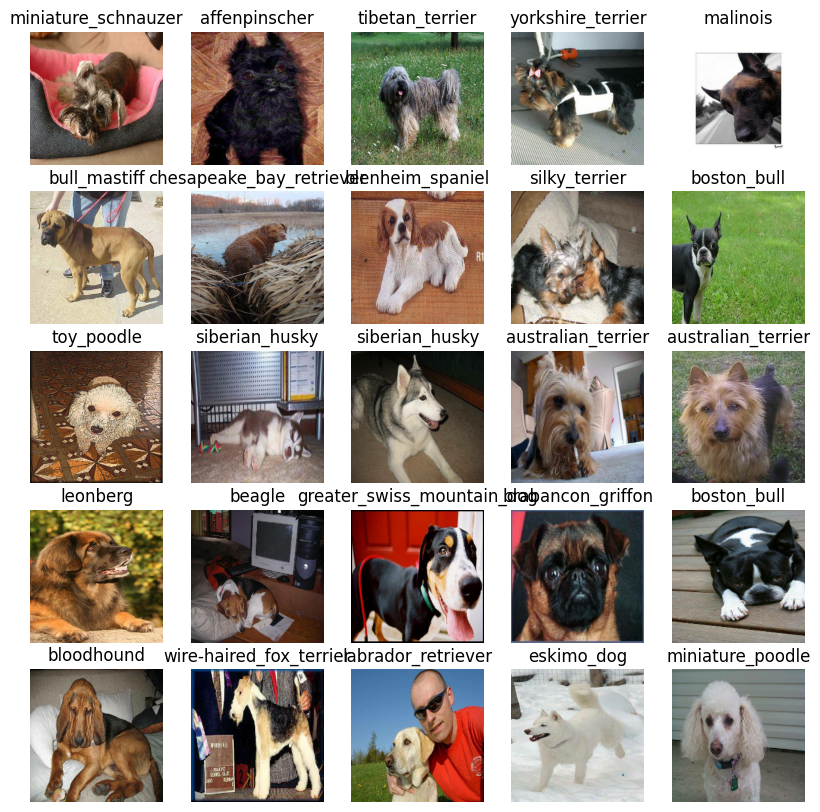

In [ ]:
show_25_images(train_images, train_labels)

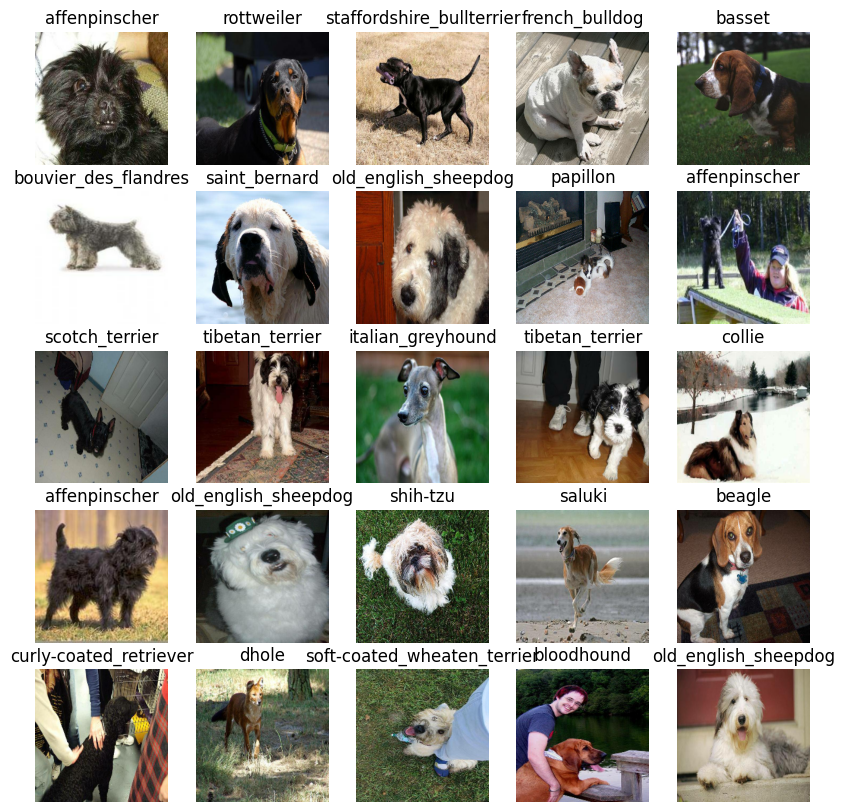

In [ ]:
# When below lines are run, images are shuffled
train_images, train_labels = next(train_data.as_numpy_iterator())
show_25_images(train_images, train_labels)

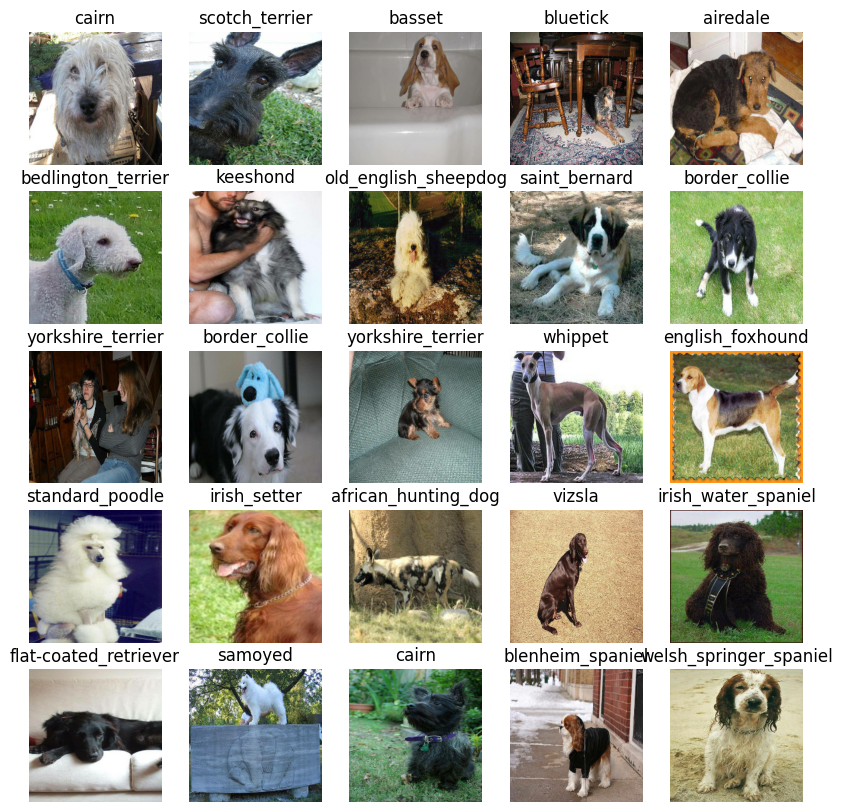

In [ ]:
# We didn't shuffled the validation data
val_images, val_labels = next(val_data.as_numpy_iterator())
show_25_images(val_images, val_labels)

### Building a model
Before building a model, define:
* The input shape (our img shape, in form of Tensors) of our model
* The output shape (img labels, in form of Tensors) of our model
* URL of model we want to use from TensorFlow Hub

In [ ]:
# Setup input shape to the model
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] # batch, height, width, colour channel

# Setup output shape to the model
OUTPUT_SHAPE = len(unique_breeds) #120

# Setup model URL from TensorFlow Hub
MODEL_URL = "https://kaggle.com/models/google/mobilenet-v2/TensorFlow2/130-224-classification/1"

###### Put them together using Keras deep learning model
Lets create a func which:
* Takes input shape, output shape and model as params
* Defines the layers in a Keras model in sequential fashion
* Compiles the model (how it should be evaluated and improved)
* Builds the model (tells the model input shape it'll be getting)
* Returns the model

In [ ]:
# Func which build a Keras model
def create_model(input_shape=INPUT_SHAPE,
                 output_shape=OUTPUT_SHAPE,
                 model_url=MODEL_URL):

  print("Building model with : ", MODEL_URL)

  # Setup model layers
  model = tf.keras.Sequential([
      hub.KerasLayer(MODEL_URL), # Layer 1 (input layer)
      tf.keras.layers.Dense(units=OUTPUT_SHAPE,
                            activation="softmax") # Layer 2 (output layer)
  ])

  # Compile the model
  model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(),
      optimizer=tf.keras.optimizers.Adam(),
      metrics=['accuracy']
  )

  # Build the model
  model.build(INPUT_SHAPE)

  return model

In [ ]:
model = create_model()
model.summary()

Building model with :  https://kaggle.com/models/google/mobilenet-v2/TensorFlow2/130-224-classification/1
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_3 (KerasLayer)  (None, 1001)              5432713   
                                                                 
 dense_3 (Dense)             (None, 120)               120240    
                                                                 
Total params: 5552953 (21.18 MB)
Trainable params: 120240 (469.69 KB)
Non-trainable params: 5432713 (20.72 MB)
_________________________________________________________________


#### Create Callbacks
* Callbacks are helper functions a model can use during training to do such things as save its progress, check its progress, or stop training early if a model stops improving.

* We'll create 2 callbacks : one for TensorBoard which helps track our models progress and another for early stopping which prevents our model from training for too long.

##### TensorBoard Callback
Do 3 things:
* Load the TensorBoard notebook extension
* Create a TensorBoard callback which save logs to a directory and pass it to model's fit() func
* Visualize our models training logs with %tensorboard magic function

In [ ]:
# load TensorBoard notebook extension
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [ ]:
import datetime

# Create a func to build a TensorBoard callback
def create_tensorboard_callback():
  # create a log directory for storing tensorflow callbacks
  logdir = os.path.join('/content/drive/MyDrive/Dog Vision/logs',
                        datetime.datetime.now().strftime("%Y%m%d-%H%M%S")) # logs get tracked whenver we run an experiment
  return tf.keras.callbacks.TensorBoard(logdir)


##### EarlyStopping callback
Helps our model from overfitting by stopping training if a certain evaluation metric stops improving

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                  patience=3)

## Training a model (on a subset of data)
Our first model is only going to train on 1000 images to make sure everything is working

In [ ]:
# Number of epochs : how many passes of data we would like our model to do
NUM_EPOCHS = 100 #@param {type:"slider", min:10, max:100, step:10}

In [ ]:
# Check to maske sure we're still running on a GPU
print("GPU", "available (YESSSS!!!!!)" if tf.config.list_physical_devices("GPU")
      else "not available")

GPU available (YESSSS!!!!!)


Create a function which trains a model
* Create a model using 'create_model()'
* Setup a TensorBoard callback using 'create_tensorboard_callback()'
* Call the 'fit()' func on our model passing it training data,validation data, number of epochs to train for and callbacks we'd like to use
* Return the model

In [ ]:
def train_model():
  """
  Trains a given model and returns the trained version
  """
  # Create a model
  model = create_model()

  # Create new Tensorboard session everytime we train a model
  tensorboard = create_tensorboard_callback()

  # Fit the model to the data passing it the callbacks we created
  model.fit(x=train_data,
            epochs=NUM_EPOCHS,
             validation_data=val_data,
             validation_freq=1,
             callbacks=[tensorboard, early_stopping])

  # Return the fitted model
  return model

In [ ]:
model = train_model()

Building model with :  https://kaggle.com/models/google/mobilenet-v2/TensorFlow2/130-224-classification/1
Epoch 1/100
 6/25 [======>.......................] - ETA: 1s - loss: 5.5962 - accuracy: 0.0156

KeyboardInterrupt: 

Our model is performing way better on training data than on testing data, it seems like it is overfitting

In [ ]:
# Checking the TensorBoard logs

%tensorboard --logdir /content/drive/MyDrive/Dog\ Vision/logs/20240705-062701

In [ ]:
val_data

In [ ]:
# Make predictions on validation data
predictions = model.predict(val_data,
                            verbose=1)
predictions

In [ ]:
predictions.shape

In [ ]:
len(y_val)

In [ ]:
len(unique_breeds)

In [ ]:
predictions[0]

In [ ]:
len(predictions[0])

In [ ]:
# It shows probability of each breed

In [ ]:
np.sum(predictions[0])  # Sum of all probs is 1

In [ ]:
# Max value probability of prediction
np.max(predictions[0])

In [ ]:
# Max value index
np.argmax(predictions[0])

In [ ]:
unique_breeds[103]

Prediction probabilities are also known as confidence levels

In [ ]:
# Turn prediction probabilities into their respective labels
def get_pred_label(prediction_probabilities):
  """
  Turns an array of prediction probabilities into a label
  """
  return unique_breeds[np.argmax(prediction_probabilities)]

In [ ]:
pred_label = get_pred_label(predictions[0])
pred_label

In [ ]:
val_data

val_data is still in batch dataset, we'll have to unbatchify it to make predictions on validation images and then compare those predictions to validation labels

In [ ]:
images_ = []
labels_ = []

for image, label in val_data.unbatch().as_numpy_iterator():
  images_.append(image)
  labels_.append(label)
  print(image)
  print(label)

In [ ]:
images_[0], labels_[0]

In [ ]:
images_[0].shape

In [ ]:
get_pred_label(labels_[0])

In [ ]:
get_pred_label(predictions[0])

In [ ]:
# Wrong prediction

In [ ]:
# Create a func for this
def unbatchify(data):
  """
  Takes a batched dataset of (image, label) Tensors
  and returns separate arrays of images and labels
  """
  images = []
  labels = []
  for image, label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique_breeds[np.argmax(label)])
  return images, labels

In [ ]:
val_images, val_labels = unbatchify(val_data)

In [ ]:
val_images[0], val_labels[0]

In [ ]:
get_pred_label(val_labels[0])

In [ ]:
get_pred_label(predictions[0])

### Visualizing
* Create a function which takes an array of prediction probabilities, an array of truth labels(Validation labels) and array of images and an integer
* Convert the prediction probabilities to predicted label
* Plot the predicted label, its predicted probability, truth label and target image on a single plot

In [ ]:
def plot_pred(prediction_probabilities,
              labels,
              images,
              n=1):
  """
  View the image, ground truth and image for sample n
  """
  pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]

  # Get the pred label
  pred_label = get_pred_label(pred_prob)

  # Plot image and remove ticks
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  # Change colour of title depending on if prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  plt.title("{} {:2.0f}% {}".format(pred_label,
                                    np.max(pred_prob) * 100,
                                    true_label),
                                    color=color)


In [ ]:
plot_pred(prediction_probabilities=predictions,
          labels=val_labels,
          images=val_images,
          n=97
          )

Lets make a function to view our model's top 10 predictions
* Takes an input of prediction_probabilities array, true labels and an integer
* Find prediction using 'get_pred_label()'
* Find top 10 prediction_probability indexes, prediction_probability values, prediction labels
* Plot top 10 prediction_probability values and labels, coloring true label green

In [ ]:
predictions[0]

In [ ]:
predictions[0].shape

In [ ]:
def plot_pred_conf(prediction_probabilities,
                   labels,
                   n=1):
  """
  Plot the top 10 highest prediction confidences along with truth labels
  """
  pred_prob, true_label = prediction_probabilities[n], labels[n]

  # Get the predicted label
  pred_label = get_pred_label(pred_prob)

  # Find top 10 prediction confidence indexes
  top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]

  # Find top 10 prediction confidence values
  top_10_pred_values = pred_prob[top_10_pred_indexes]

  # Find top 10 prediction labels
  top_10_pred_labels = unique_breeds[top_10_pred_indexes]

  # Setup plot
  top_plot = plt.bar(np.arange(len(top_10_pred_labels)),
                     top_10_pred_values,
                     color="grey")
  plt.xticks(np.arange(len(top_10_pred_labels)),
             labels=top_10_pred_labels,
             rotation="vertical")

  # Change color of true label
  if np.isin(true_label, top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("green")
  else:
    pass

In [ ]:
plot_pred_conf(prediction_probabilities=predictions,
               labels=val_labels,
               n=9)

In [ ]:
predictions[0]

In [ ]:
predictions[0].shape

In [ ]:
predictions[0].argsort()
# gives us order of indexes that will sort the array

In [ ]:
predictions[0].argsort()[-10:][::-1]  # Indexes of top 10 highest predictions

In [ ]:
index = predictions[0].argsort()[-10:][::-1]
predictions[0][index]

In [ ]:
predictions[0].max()

In [ ]:
unique_breeds[index]

In [ ]:
# Lets check some predictions
i_multiplier = 0
num_rows = 3
num_cols = 2
num_images = num_rows * num_cols

plt.figure(figsize=(10*num_cols, 5*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_pred(prediction_probabilities=predictions,
            labels=val_labels,
            images=val_images,
            n=i+i_multiplier)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_pred_conf(prediction_probabilities=predictions,
                 labels=val_labels,
                 n=i+i_multiplier)
  plt.tight_layout()
plt.show()

### Saving and reloading a trained model

In [ ]:
def save_model(model, suffix=None):
  """
  Saves a given model in a model's directory and appends a suffix (string)
  """
  # Create a model directory pathname with current time
  modeldir = os.path.join("/content/drive/MyDrive/Dog Vision/models",
                          datetime.datetime.now().strftime("%Y%m%d-%H%M%s"))
  model_path = modeldir + "-" + suffix + ".h5" #save format of model
  print(f'Saving model to: {model_path}...')
  model.save(model_path)
  return model_path

In [ ]:
def load_model(model_path):
  """
  Loads a saved model from a specified path
  """
  print(f"Loading saved model from: {model_path}")
  model = tf.keras.models.load_model(model_path,
                                     custom_objects={"KerasLayer":hub.KerasLayer})
  return model

In [ ]:
# Save our model trained on 1000 images
save_model(model, suffix="1000-images-mobilenetv2-Adam")

In [ ]:
# Load a trained model
loaded_1000_image_model = load_model('/content/drive/MyDrive/Dog Vision/models/20240707-17261720373206-1000-images-mobilenetv2-Adam.h5')

In [ ]:
# Evaluate the pre-saved model
model.evaluate(val_data)

In [ ]:
# Evaluate the loaded model
loaded_1000_image_model.evaluate(val_data)

### Training the model on full data

In [ ]:
len(X), len(y)

In [ ]:
X[:10]

In [ ]:
len(X_train), len(y_train)

In [ ]:
X_train[:10]

In [ ]:
y[:2]

In [ ]:
# Create a data batch with the full dataset
full_data = create_data_batches(X, y)

Creating training data batches.......


In [ ]:
full_data

In [ ]:
# Create a model for full model
full_model = create_model()

In [ ]:
# Create full model callbacks
full_model_tensorboard = create_tensorboard_callback()
# No validation set when training on all the data, so we can't monitor validation accuracy
full_model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor="accuracy",
                                                             patience=3)

In [ ]:
# Fit the model to full data
full_model.fit(x=full_data,
               epochs=NUM_EPOCHS,
               callbacks=[full_model_tensorboard, full_model_early_stopping])

Epoch 1/100
320/320 [==============================] - 42s 131ms/step - loss: 0.2613 - accuracy: 0.9255
Epoch 2/100
320/320 [==============================] - 43s 135ms/step - loss: 0.1649 - accuracy: 0.9586
Epoch 3/100
320/320 [==============================] - 42s 130ms/step - loss: 0.1131 - accuracy: 0.9763
Epoch 4/100
320/320 [==============================] - 42s 132ms/step - loss: 0.0779 - accuracy: 0.9872
Epoch 5/100
320/320 [==============================] - 43s 134ms/step - loss: 0.0622 - accuracy: 0.9910
Epoch 6/100
320/320 [==============================] - 43s 136ms/step - loss: 0.0470 - accuracy: 0.9936
Epoch 7/100
320/320 [==============================] - 42s 131ms/step - loss: 0.0379 - accuracy: 0.9963
Epoch 8/100
320/320 [==============================] - 42s 132ms/step - loss: 0.0304 - accuracy: 0.9977
Epoch 9/100
320/320 [==============================] - 42s 131ms/step - loss: 0.0270 - accuracy: 0.9982
Epoch 10/100
320/320 [==============================] - 42s 132m

In [ ]:
save_model(full_model, suffix="full-image-set-mobilenetv2-Adam")

Saving model to: /content/drive/MyDrive/Dog Vision/models/20240709-06181720505918-full-image-set-mobilenetv2-Adam.h5...


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


'/content/drive/MyDrive/Dog Vision/models/20240709-06181720505918-full-image-set-mobilenetv2-Adam.h5'

In [ ]:
loaded_full_model = load_model('/content/drive/MyDrive/Dog Vision/models/20240709-06181720505918-full-image-set-mobilenetv2-Adam.h5')

Loading saved model from: /content/drive/MyDrive/Dog Vision/models/20240709-06181720505918-full-image-set-mobilenetv2-Adam.h5


### Making predictions on test dataset
Steps:
* Get the test images filenames.
* Convert the filenames into test data batches using 'create_data_batches() and setting 'test_data()' parameter to 'True' (since the test data does not have labels).
* Make a predictions array by passing test data batches to 'predict()' method called on our model,


In [ ]:
# Load test image filenames
import os
test_path = '/content/drive/MyDrive/Dog Vision/dog-breed-identification/test/'
test_filenames = [test_path + fname for fname in os.listdir(test_path)]
test_filenames[:10]

['/content/drive/MyDrive/Dog Vision/dog-breed-identification/test/f31bfb17e3d1800493376fffd77fed72.jpg',
 '/content/drive/MyDrive/Dog Vision/dog-breed-identification/test/f2c4131850c17dee485d48c2bb8a358e.jpg',
 '/content/drive/MyDrive/Dog Vision/dog-breed-identification/test/f367afa19bb30234fafa16c64b3730f0.jpg',
 '/content/drive/MyDrive/Dog Vision/dog-breed-identification/test/f02b0bb575f8dd86c63ab38df20483ba.jpg',
 '/content/drive/MyDrive/Dog Vision/dog-breed-identification/test/edd5c8d96746d4af7eed0550eafd4b90.jpg',
 '/content/drive/MyDrive/Dog Vision/dog-breed-identification/test/f320aa2676156d3760a409e1b333474d.jpg',
 '/content/drive/MyDrive/Dog Vision/dog-breed-identification/test/f0341ba6b21465ece32d7df0ebff3048.jpg',
 '/content/drive/MyDrive/Dog Vision/dog-breed-identification/test/f300694670b4219cf9e8f23306ae3407.jpg',
 '/content/drive/MyDrive/Dog Vision/dog-breed-identification/test/f57f8ce3fe1d928828e37a9bd78574d9.jpg',
 '/content/drive/MyDrive/Dog Vision/dog-breed-identific

In [ ]:
len(test_filenames)

10226

In [ ]:
test_data = create_data_batches(test_filenames, test_data=True)

Creating test data batches.......


In [ ]:
test_data

<_BatchDataset element_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None)>

In [ ]:
# Make predictions
test_predictions = loaded_full_model.predict(test_data,
                                             verbose=1)

320/320 [==============================] - 257s 789ms/step


In [ ]:
np.savetxt('/content/drive/MyDrive/Dog Vision/preds_array.csv', test_predictions, delimiter=",")

In [ ]:
test_preds = np.loadtxt('/content/drive/MyDrive/Dog Vision/preds_array.csv', delimiter=",")

In [ ]:
test_preds[:10]

array([[9.25254096e-09, 9.84237431e-06, 1.52005997e-09, ...,
        1.04954729e-07, 8.37606322e-08, 8.75479873e-06],
       [2.02968842e-09, 7.48548307e-11, 3.46015633e-10, ...,
        1.43843859e-09, 7.93342902e-09, 6.40293074e-05],
       [1.42821553e-11, 4.53219537e-16, 1.35368835e-15, ...,
        5.84863375e-15, 1.33837949e-11, 8.07345456e-13],
       ...,
       [1.00256956e-12, 1.45530588e-09, 8.50656004e-12, ...,
        1.02184747e-10, 6.60329647e-07, 6.96629421e-11],
       [4.18511519e-08, 1.51647167e-11, 8.19130191e-13, ...,
        9.39935775e-15, 2.17577414e-11, 2.04208150e-10],
       [7.34584726e-10, 4.00655984e-12, 9.29247456e-13, ...,
        1.62983047e-14, 2.09326292e-10, 3.77783094e-09]])

In [ ]:
test_preds.shape

(10226, 120)

## Preparing test dataset predictions for Kaggle
* Create a pandas DataFrame with an ID column as well as a column for each dog unique_breeds
* Add data to ID column by extracting the test image ID's from their filepaths
* Add data (prediction probabilities) to each dog breed column
* Export the DataFrame as CSV to submit it to Kaggle

In [ ]:
preds_df = pd.DataFrame(columns=["id"] + list(unique_breeds))

In [ ]:
preds_df.head()

Empty DataFrame
Columns: [id, affenpinscher, afghan_hound, african_hunting_dog, airedale, american_staffordshire_terrier, appenzeller, australian_terrier, basenji, basset, beagle, bedlington_terrier, bernese_mountain_dog, black-and-tan_coonhound, blenheim_spaniel, bloodhound, bluetick, border_collie, border_terrier, borzoi, boston_bull, bouvier_des_flandres, boxer, brabancon_griffon, briard, brittany_spaniel, bull_mastiff, cairn, cardigan, chesapeake_bay_retriever, chihuahua, chow, clumber, cocker_spaniel, collie, curly-coated_retriever, dandie_dinmont, dhole, dingo, doberman, english_foxhound, english_setter, english_springer, entlebucher, eskimo_dog, flat-coated_retriever, french_bulldog, german_shepherd, german_short-haired_pointer, giant_schnauzer, golden_retriever, gordon_setter, great_dane, great_pyrenees, greater_swiss_mountain_dog, groenendael, ibizan_hound, irish_setter, irish_terrier, irish_water_spaniel, irish_wolfhound, italian_greyhound, japanese_spaniel, keeshond, kelpie, kerry_blue_terrier, komondor, kuvasz, labrador_retriever, lakeland_terrier, leonberg, lhasa, malamute, malinois, maltese_dog, mexican_hairless, miniature_pinscher, miniature_poodle, miniature_schnauzer, newfoundland, norfolk_terrier, norwegian_elkhound, norwich_terrier, old_english_sheepdog, otterhound, papillon, pekinese, pembroke, pomeranian, pug, redbone, rhodesian_ridgeback, rottweiler, saint_bernard, saluki, samoyed, schipperke, scotch_terrier, scottish_deerhound, sealyham_terrier, ...]
Index: []

[0 rows x 121 columns]

In [ ]:
test_filenames[:10]

['/content/drive/MyDrive/Dog Vision/dog-breed-identification/test/f31bfb17e3d1800493376fffd77fed72.jpg',
 '/content/drive/MyDrive/Dog Vision/dog-breed-identification/test/f2c4131850c17dee485d48c2bb8a358e.jpg',
 '/content/drive/MyDrive/Dog Vision/dog-breed-identification/test/f367afa19bb30234fafa16c64b3730f0.jpg',
 '/content/drive/MyDrive/Dog Vision/dog-breed-identification/test/f02b0bb575f8dd86c63ab38df20483ba.jpg',
 '/content/drive/MyDrive/Dog Vision/dog-breed-identification/test/edd5c8d96746d4af7eed0550eafd4b90.jpg',
 '/content/drive/MyDrive/Dog Vision/dog-breed-identification/test/f320aa2676156d3760a409e1b333474d.jpg',
 '/content/drive/MyDrive/Dog Vision/dog-breed-identification/test/f0341ba6b21465ece32d7df0ebff3048.jpg',
 '/content/drive/MyDrive/Dog Vision/dog-breed-identification/test/f300694670b4219cf9e8f23306ae3407.jpg',
 '/content/drive/MyDrive/Dog Vision/dog-breed-identification/test/f57f8ce3fe1d928828e37a9bd78574d9.jpg',
 '/content/drive/MyDrive/Dog Vision/dog-breed-identific

In [ ]:
test_ids = [os.path.splitext(path) for path in os.listdir(test_path)]
test_ids

[('f31bfb17e3d1800493376fffd77fed72', '.jpg'),
 ('f2c4131850c17dee485d48c2bb8a358e', '.jpg'),
 ('f367afa19bb30234fafa16c64b3730f0', '.jpg'),
 ('f02b0bb575f8dd86c63ab38df20483ba', '.jpg'),
 ('edd5c8d96746d4af7eed0550eafd4b90', '.jpg'),
 ('f320aa2676156d3760a409e1b333474d', '.jpg'),
 ('f0341ba6b21465ece32d7df0ebff3048', '.jpg'),
 ('f300694670b4219cf9e8f23306ae3407', '.jpg'),
 ('f57f8ce3fe1d928828e37a9bd78574d9', '.jpg'),
 ('eb9e89f5c0f1717f290360fec6f2a160', '.jpg'),
 ('f3d5aa14bae0561b6b9146d7e7fa0917', '.jpg'),
 ('f1dcabbeb1dbebb326a4b029b6f8b188', '.jpg'),
 ('f155d5fe889d139892c1d7d46804f419', '.jpg'),
 ('ee0f518cd7eb01b2b774f3d2329e58f9', '.jpg'),
 ('ecab3cabdfabe8663ab388e891afdbed', '.jpg'),
 ('ee5345121b497708b4f9510fec148f65', '.jpg'),
 ('e9cee3bd9000422ec5e391c932da60f8', '.jpg'),
 ('ee76bbe553722f075e334dc29f3173a9', '.jpg'),
 ('eb44625ed1113825fe1f23e50222cca1', '.jpg'),
 ('e85d4e2707683df0e6387e19b67b873d', '.jpg'),
 ('f0933ef7831649c79490ebb34de07a01', '.jpg'),
 ('ea5a0fb0d9

In [ ]:
test_ids = [os.path.splitext(path)[0] for path in os.listdir(test_path)]
test_ids

['f31bfb17e3d1800493376fffd77fed72',
 'f2c4131850c17dee485d48c2bb8a358e',
 'f367afa19bb30234fafa16c64b3730f0',
 'f02b0bb575f8dd86c63ab38df20483ba',
 'edd5c8d96746d4af7eed0550eafd4b90',
 'f320aa2676156d3760a409e1b333474d',
 'f0341ba6b21465ece32d7df0ebff3048',
 'f300694670b4219cf9e8f23306ae3407',
 'f57f8ce3fe1d928828e37a9bd78574d9',
 'eb9e89f5c0f1717f290360fec6f2a160',
 'f3d5aa14bae0561b6b9146d7e7fa0917',
 'f1dcabbeb1dbebb326a4b029b6f8b188',
 'f155d5fe889d139892c1d7d46804f419',
 'ee0f518cd7eb01b2b774f3d2329e58f9',
 'ecab3cabdfabe8663ab388e891afdbed',
 'ee5345121b497708b4f9510fec148f65',
 'e9cee3bd9000422ec5e391c932da60f8',
 'ee76bbe553722f075e334dc29f3173a9',
 'eb44625ed1113825fe1f23e50222cca1',
 'e85d4e2707683df0e6387e19b67b873d',
 'f0933ef7831649c79490ebb34de07a01',
 'ea5a0fb0d92c07b2e14da4dcd0d48c45',
 'edd7c1e04601546fc101901d764dc4b4',
 'eadffa2af96b121d7e61dcd91ab11a39',
 'eddf1be0c12c7f3a5029a7787e89476f',
 'ec6734fb75cab5100481b7b6e711d936',
 'f4eb6450497df847ef1012d61d869007',
 

In [ ]:
preds_df["id"] = test_ids

In [ ]:
preds_df[list(unique_breeds)] = test_preds

In [ ]:
preds_df.head()

id  affenpinscher  afghan_hound  \
0  f31bfb17e3d1800493376fffd77fed72   9.252541e-09  9.842374e-06   
1  f2c4131850c17dee485d48c2bb8a358e   2.029688e-09  7.485483e-11   
2  f367afa19bb30234fafa16c64b3730f0   1.428216e-11  4.532195e-16   
3  f02b0bb575f8dd86c63ab38df20483ba   1.121797e-11  1.022271e-11   
4  edd5c8d96746d4af7eed0550eafd4b90   2.164857e-10  4.528086e-11   

   african_hunting_dog      airedale  american_staffordshire_terrier  \
0         1.520060e-09  1.156392e-08                    3.840910e-06   
1         3.460156e-10  1.578649e-10                    4.575385e-10   
2         1.353688e-15  1.257755e-13                    9.376620e-12   
3         1.832644e-10  7.463972e-09                    2.343386e-08   
4         9.480161e-13  2.495821e-06                    1.486194e-08   

    appenzeller  australian_terrier       basenji        basset  ...  \
0  2.261694e-06        6.494148e-10  5.532102e-08  2.829515e-04  ...   
1  2.758038e-06        1.191654e-04  1.896368e-09  6.436528e-15  ...   
2  1.944169e-11        1.558733e-16  1.604843e-15  6.747162e-15  ...   
3  4.831336e-04        8.644097e-10  2.011635e-09  6.988103e-10  ...   
4  3.890283e-07        2.134454e-07  8.468454e-08  4.831633e-09  ...   

     toy_poodle   toy_terrier        vizsla  walker_hound    weimaraner  \
0  3.556768e-04  7.648143e-09  1.543124e-06  1.960757e-06  4.244520e-08   
1  4.129920e-11  9.996235e-01  8.820744e-11  9.848949e-10  2.146288e-11   
2  9.077152e-11  4.360953e-10  9.553198e-10  7.345569e-09  2.606039e-08   
3  1.423399e-10  4.451242e-12  4.828236e-10  5.639585e-07  5.440140e-10   
4  1.421468e-10  3.191450e-09  1.043150e-07  5.197029e-09  1.647847e-07   

   welsh_springer_spaniel  west_highland_white_terrier       whippet  \
0            9.095914e-02                 2.335317e-04  1.049547e-07   
1            2.081621e-13                 1.516301e-08  1.438439e-09   
2            3.163875e-15                 4.794681e-13  5.848634e-15   
3            3.370893e-08                 2.251886e-11  9.102373e-10   
4            5.818052e-10                 2.757896e-12  3.362072e-09   

   wire-haired_fox_terrier  yorkshire_terrier  
0             8.376063e-08       8.754799e-06  
1             7.933429e-09       6.402931e-05  
2             1.338379e-11       8.073455e-13  
3             5.955446e-11       8.154414e-10  
4             6.219589e-13       4.883746e-07  

[5 rows x 121 columns]

In [ ]:
preds_df.to_csv('/content/drive/MyDrive/Dog Vision/full_model_predictions.csv',
                index=False)

In [ ]:
preds_df.shape

(10226, 121)

In [ ]:
len(test_filenames)

10226